# 0. Import and function definition

In [1]:
!ls

__pycache__  README.md	windEnv.py  wind_notebook.ipynb


In [2]:
import numpy as np
import copy
from windEnv import *
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def vizualize_moves(states,ax=None):
    """
    show heatmap of the agent's movements
    inputs : states (type = list)
    """
    states = np.array(states)
    count_array = np.zeros(shape, dtype=np.int)
    for x in range(env.xlimit+1):
        for y in range(env.ylimit+1):
            y_idx_set = set(np.where(np.equal(states[:,0], y))[0])
            x_idx_set = set(np.where(np.equal(states[:,1], x))[0])
            count_array[y,x] = len(x_idx_set.intersection(y_idx_set))
    if type(ax) == None:
        sns.heatmap(count_array,cmap="Reds")
    else:
        return sns.heatmap((count_array),ax=ax,cmap="Reds")

In [4]:
def train_agent(agent,max_step,env,get_historic=False):
    """
    train the agent in the environment
    """
    if get_historic:
        states_historic = []
    step = 0
    while step<max_step and agent.state != env.goal:
        step+=1
        agent.fitstep(env)
        if get_historic:
            states_historic.append(copy.deepcopy(agent.state))
    if get_historic:
        return np.array(states_historic),step

# 1. Problem definition

In [21]:
# create wind array
shape = (7,10)
wind = np.zeros(shape,dtype=int)
wind[:,[3,4,5,8]] = 1
wind[:,[6,7]] = 2

#goal location (y,x)
goal = [3,7]

#starting point (y,x)
start = [3,0]

#create env :
env = WindyEnv(wind, goal, start)

epsilon = 0.1
gamma = 0.9
alpha = 0.5

N_gen = 100
max_step = 1000

N_to_show = 10 #number of gens we want to show on the plots

# 2. Qlearning agents

In [22]:
# train
q=None

q_list = []
states_historic=[]
step_historic = []
for n in range(N_gen):
    agent = qlearning_agent(epsilon, env,gamma,alpha,q) # after the first iteration, q will be already created (!=None)
    
    #training, and keep history of the training
    states, step = train_agent(agent,max_step, env,get_historic=True)
    states_historic.append(states)
    step_historic.append(step)
    
    q = copy.deepcopy(agent.q)
    q_list.append(q)
    #print(n,"gen.,\n", step,"step(s)")
    #agent.show(env)

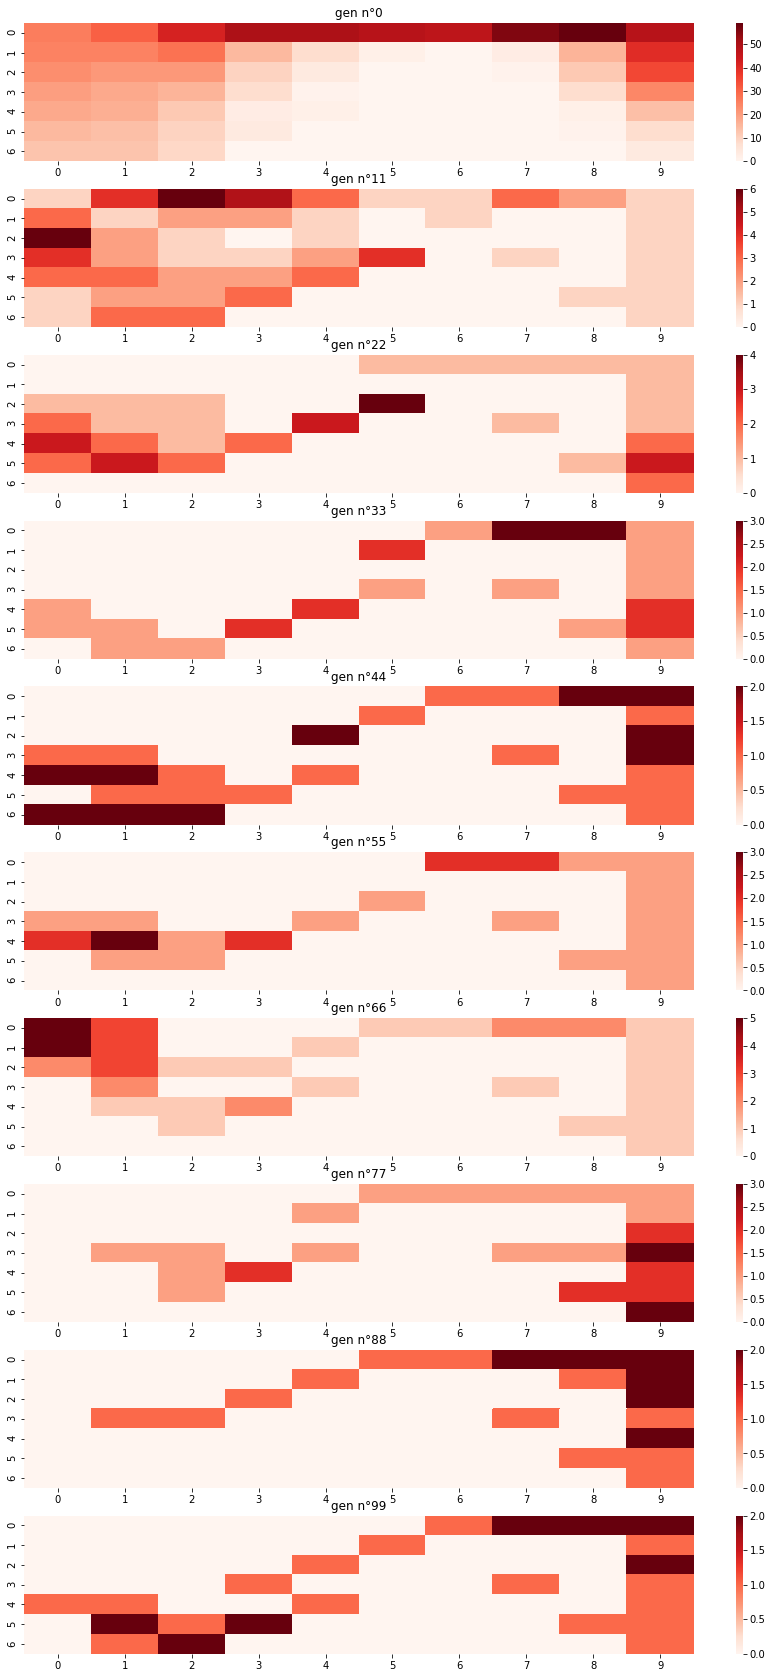

In [23]:
# Here we vizualize which location are visited by the chosen individuals
gen_to_show = [int(elem) for elem in np.linspace(0,N_gen-1,N_to_show)]
red_states_historic = [states_historic[i] for i in gen_to_show]

fig, axes = plt.subplots(len(red_states_historic),figsize=(15,15*len(red_states_historic)//5))

for i in range(len(gen_to_show)):
    axes[i] = vizualize_moves(red_states_historic[i],axes[i])
    axes[i].set_title("gen n°" + str(gen_to_show[i]))
    
#we can see that the optimal path is explored more deeply when the generation increase
#last generation of agent has the optimal policy

/home/klegoff/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Number of steps by generation')

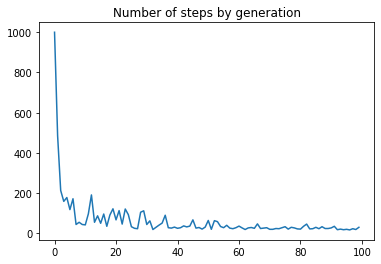

In [24]:
#Show the evolution of the number of steps made by the agent of each generation
sns.lineplot(list(range(N_gen)), step_historic).set_title("Number of steps by generation")

#After 40th generation, we get agents that are capable of exploring without loosing themselves

# 3. Sarsa agents

In [26]:
# train
q= None

q_list = []
states_historic=[]
step_historic = []
for n in range(100):
    agent = sarsa_agent(epsilon, env,gamma,alpha,q)
    init_states = np.array([env.start, agent.state])
    train_states, step = train_agent(agent,max_step, env,get_historic=True)
    states = np.concatenate([init_states, train_states])

    states_historic.append(copy.deepcopy(states))
    step_historic.append(step)

        
    q = copy.deepcopy(agent.q)
    q_list.append(q)
    #print(n,"gen.,\n", step,"step(s)")
    #agent.show(env)

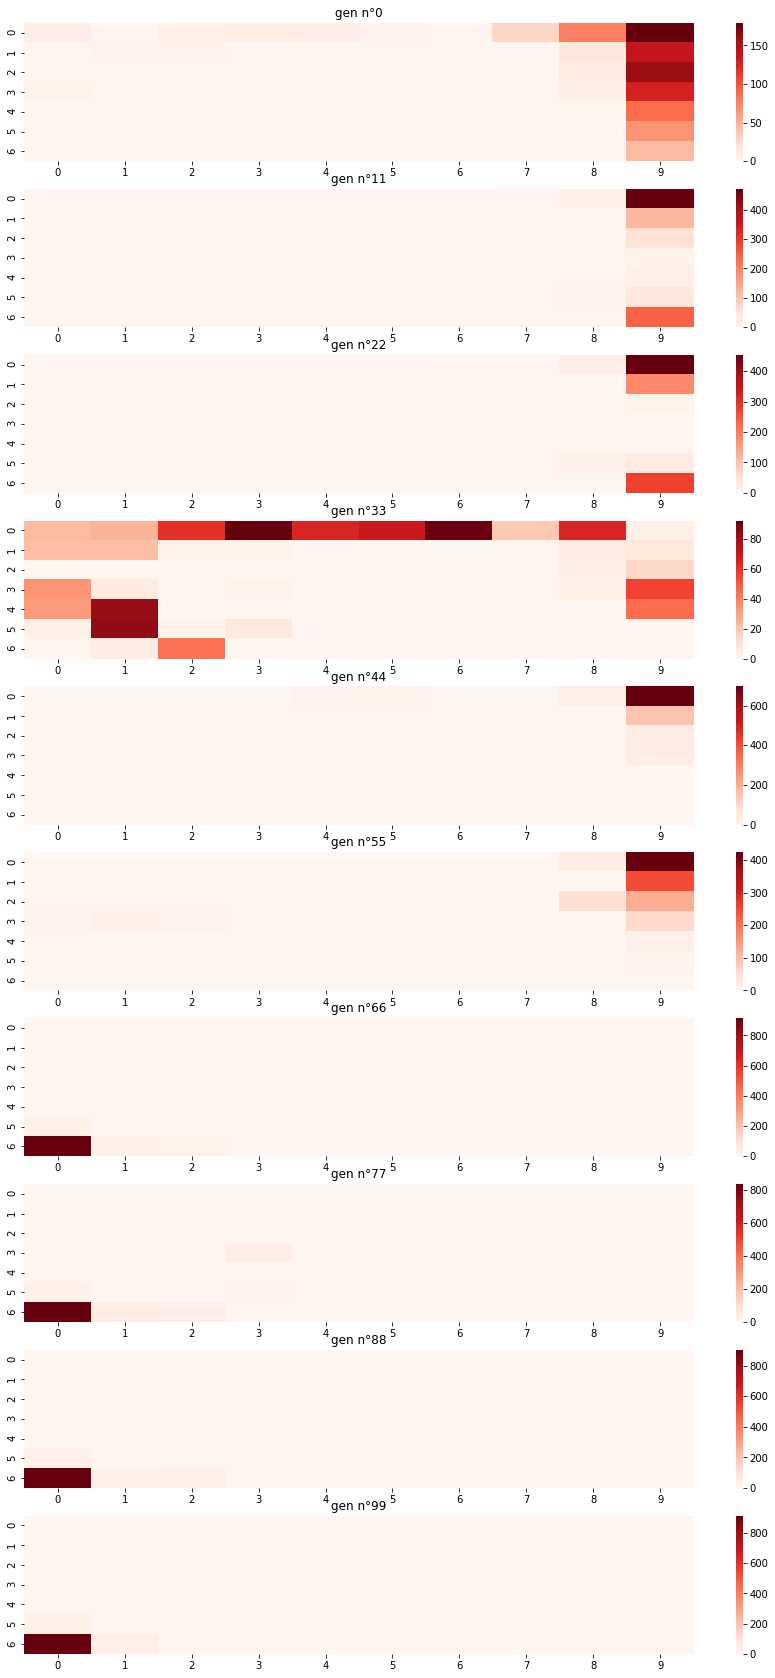

In [27]:
# Here we vizualize which location are visited by the chosen individuals
gen_to_show = [int(elem) for elem in np.linspace(0,N_gen-1,N_to_show)]
red_states_historic = [states_historic[i] for i in gen_to_show]
fig, axes = plt.subplots(len(red_states_historic),figsize=(15,15*len(red_states_historic)//5))

for i in range(len(gen_to_show)):
    axes[i] = vizualize_moves(red_states_historic[i],axes[i])
    axes[i].set_title("gen n°" + str(gen_to_show[i]))
    


/home/klegoff/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Number of steps by generation')

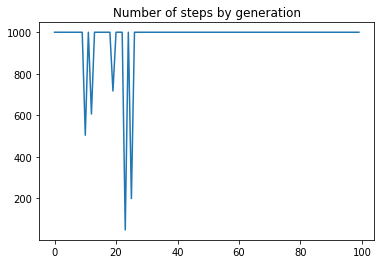

In [28]:
#Show the evolution of the number of steps made by the agent of each generation
sns.lineplot(list(range(N_gen)), step_historic).set_title("Number of steps by generation")